### Classification of product data as per towards classification  of product data paper.


### Implement the solution for given data
### Data is in json format.

#### Import libraries

In [4]:
pip install pandas


     |████████████████████████████████| 10.7 MB 677 kB/s eta 0:00:01    |███████████████████             | 6.3 MB 532 kB/s eta 0:00:09     |███████████████████▍            | 6.5 MB 376 kB/s eta 0:00:12     |██████████████████████████▎     | 8.8 MB 714 kB/s eta 0:00:03
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.12/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib


     |████████████████████████████████| 7.2 MB 1.9 MB/s eta 0:00:01     |▏                               | 30 kB 2.5 MB/s eta 0:00:03     |██████▊                         | 1.5 MB 1.9 MB/s eta 0:00:03
     |████████████████████████████████| 61 kB 553 kB/s  eta 0:00:01
     |████████████████████████████████| 2.8 MB 6.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.12/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

     |████████████████████████████████| 285 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 209 kB/s eta 0:00:01    |▌                               | 471 kB 5.8 MB/s eta 0:00:06     |███▉                            | 3.7 MB 295 kB/s eta 0:01:33     |█████▍                          | 5.2 MB 555 kB/s eta 0:00:47     |███████████                     | 10.6 MB 491 kB/s eta 0:00:42     |████████████████▉               | 16.2 MB 542 kB/s eta 0:00:28     |█████████████████████▌          | 20.7 MB 647 kB/s eta 0:00:16
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.12/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import data(which is in json format).

In [8]:
# Use pandas function of read_json to read data from json file and to store it to a pandas dataframe.
df = pd.read_json('data.json')

In [9]:
# The data here is of brakepads.
df.head()

,partNumber,classOfPart,length,width,thickness
0,402B0788,Hinterachse,108.7,None,14
1,402B0038,None,None,61.6,15.7
2,402B0143,None,None,126.9,16.5
3,402B0131,None,None,61.7,15.5
4,402B0690,None,None,98.8,15


#### We can see that we have 4 columns(features).
#### The data is well structured and also the target variable(classOfPart) is given to us.

In [10]:
df.shape

(4001, 5)

In [11]:
df.describe()

,partNumber,classOfPart,length,width,thickness
count,4001,1440,1624,2585,3981
unique,3996,2,503,780,119
top,05P384,Vorderachse,155.2,156.3,15
freq,2,907,42,51,307


### Part number is unique identifier so we can drop it.

### We can see that classOfPart has only 2 unique classes so we need to predict 2 classes.

In [12]:
df['classOfPart'].value_counts()

Vorderachse    907
Hinterachse    533
Name: classOfPart, dtype: int64

In [13]:
df['classOfPart'].isnull().sum()

2561

In [14]:
2561+1440

4001

In [15]:
df.dropna(subset=['classOfPart'],how='any',inplace=True)
df.shape

(1440, 5)

In [16]:
df.isnull().sum()

partNumber       0
classOfPart      0
length         397
width          930
thickness       18
dtype: int64

In [17]:
df[(df['length'].isnull()) & (df['width'].isnull()) & (df['thickness'].isnull())]

,partNumber,classOfPart,length,width,thickness
36,402B0703,Vorderachse,None,None,None
448,402B0472,Vorderachse,None,None,None
525,402B0915,Vorderachse,None,None,None
921,V30-8102-1,Vorderachse,None,None,None
1078,02.35.142,Hinterachse,None,None,None
1316,573369JC,Hinterachse,None,None,None
1927,SKBP-0011036,Vorderachse,None,None,None
2802,SKBP-0011259,Vorderachse,None,None,None
2887,SKBP-0011509,Vorderachse,None,None,None
3149,08.35.045,Hinterachse,None,None,None


In [18]:
df.drop(df[(df['length'].isnull()) & (df['width'].isnull()) & (df['thickness'].isnull())].index,inplace=True)

### We further have 15 more rows wherein we have missing values in all 3 features(important).
### We can look to drop these rows

In [19]:
df.isnull().sum()

partNumber       0
classOfPart      0
length         382
width          915
thickness        3
dtype: int64

### 1. length

In [20]:
df['length']=df['length'].astype('float64')

In [21]:
# Replace missing values in length column by mean of its respective classOfPart 
df['length'] = (df['length'].fillna(df.groupby('classOfPart')['length'].transform('mean')).astype(float))

In [22]:
df['length'].isnull().sum()

0

In [23]:
df['length']

0       108.700000
5       103.368544
10      107.800000
11      103.368544
15       95.000000
           ...    
3988    133.160957
3989    103.368544
3990    103.368544
3998    103.368544
3999    133.160957
Name: length, Length: 1425, dtype: float64

In [24]:
df['length'].dtype

dtype('float64')

### 2. width

In [25]:
df['width'].isnull().sum()

915

In [26]:
df['width'].dtype

dtype('O')

In [27]:
df['width'] = df['width'].astype('float64')

In [28]:
df['width'] = df['width'].fillna(df.groupby('classOfPart')['width'].transform('mean')).astype(float)

In [29]:
df['width'].isnull().sum()

0

### 3. thickness

In [30]:
df['thickness'].isnull().sum()

3

In [31]:
df['thickness'].dtype

dtype('O')

In [32]:
df['thickness'] = df['thickness'].astype('float64')

In [33]:
df['thickness'] = df['thickness'].fillna(df.groupby('classOfPart')['thickness'].transform('mean')).astype(float)

In [34]:
df['thickness'].isnull().sum()

0

### Now, we have replaced all the missing values so let us take up some analysis.

### Let us replace the 2 classes in the target feature with 0 & 1.

In [35]:
df['classOfPart'].isnull().sum()

0

In [36]:
df['classOfPart'].replace({'Hinterachse':0,'Vorderachse':1},inplace=True)

In [37]:
df.head()

,partNumber,classOfPart,length,width,thickness
0,402B0788,0,108.700000,81.124251,14.0
5,402B0041,0,103.368544,93.100000,16.0
10,402B0030,0,107.800000,81.124251,12.9
11,402B0462,0,103.368544,53.800000,15.4
15,402B0055,0,95.000000,81.124251,15.8


/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'length'), Text(0, 0.5, 'count')]

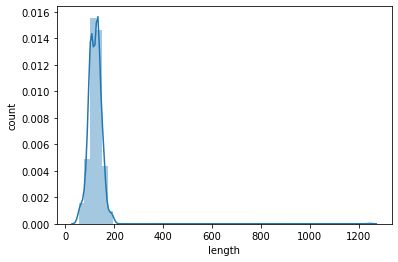

In [38]:
sns.distplot(df['length']).set(xlabel='length',ylabel='count')

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'width'), Text(0, 0.5, 'count')]

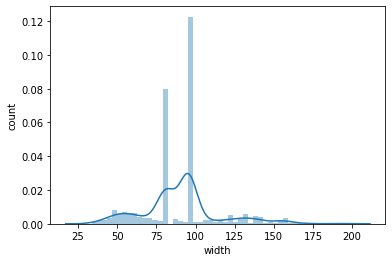

In [39]:
sns.distplot(df['width']).set(xlabel='width',ylabel='count')

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'thickness'), Text(0, 0.5, 'count')]

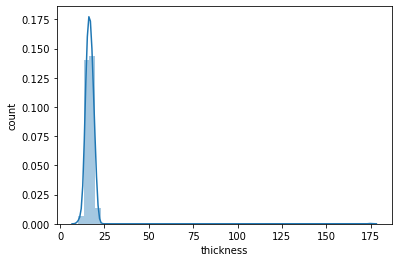

In [40]:
sns.distplot(df['thickness']).set(xlabel='thickness',ylabel='count')

In [41]:
df.drop(['partNumber'],axis=1,inplace=True)

In [42]:
df.head()

,classOfPart,length,width,thickness
0,0,108.700000,81.124251,14.0
5,0,103.368544,93.100000,16.0
10,0,107.800000,81.124251,12.9
11,0,103.368544,53.800000,15.4
15,0,95.000000,81.124251,15.8


In [43]:
df['classOfPart'].value_counts()

1    897
0    528
Name: classOfPart, dtype: int64

### We now have 897 records of Vorderachse(front axle) and 528 records of Hinterachse(hind axle).

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length', ylabel='width'>

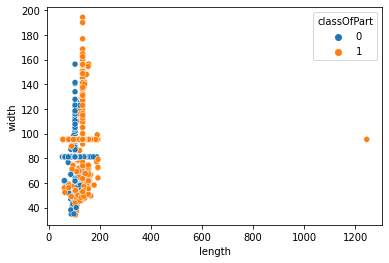

In [44]:
sns.scatterplot(df['length'],df['width'],hue=df['classOfPart'])

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length', ylabel='thickness'>

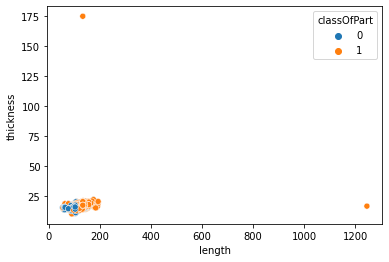

In [45]:
sns.scatterplot(df['length'],df['thickness'],hue=df['classOfPart'])

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='width', ylabel='thickness'>

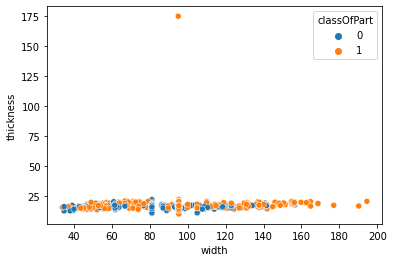

In [46]:
sns.scatterplot(df['width'],df['thickness'],hue=df['classOfPart'])

In [47]:
X=df.iloc[:,1:]
y=df['classOfPart']

In [48]:
X

,length,width,thickness
0,108.700000,81.124251,14.0
5,103.368544,93.100000,16.0
10,107.800000,81.124251,12.9
11,103.368544,53.800000,15.4
15,95.000000,81.124251,15.8
...,...,...,...
3988,133.160957,95.315394,16.8
3989,103.368544,110.500000,15.5
3990,103.368544,107.700000,14.0
3998,103.368544,81.124251,15.8


In [49]:
y

0       0
5       0
10      0
11      0
15      0
       ..
3988    1
3989    0
3990    0
3998    0
3999    1
Name: classOfPart, Length: 1425, dtype: int64

### SMOTE over sampling technique

In [53]:
pip install sklearn

     |████████████████████████████████| 7.3 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 2.1 MB/s eta 0:00:01
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.12/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=12,sampling_strategy=0.65)

ModuleNotFoundError: No module named 'imblearn'

In [51]:
from sklearnrn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)

ModuleNotFoundError: No module named 'sklearn'

In [52]:
y_count=pd.DataFrame(y_train)
y_count['classOfPart'].value_counts()

NameError: name 'y_train' is not defined

In [194]:
X_sm,y_sm=smote.fit_sample(X_train,y_train)

In [195]:
y_sm_count=pd.DataFrame(y_sm)

In [196]:
y_sm_count['classOfPart'].value_counts()

1    633
0    411
Name: classOfPart, dtype: int64

### We have oversampled the 0 class(rear axle) to 575 which is 85% of the front axle class in the training set.

### Train some models to get our predictions.

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

### 1. Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [48]:
dt.fit(X_train,y_train)
y_dt_pred=dt.predict(X_test)

In [49]:
print(confusion_matrix(y_test,y_dt_pred))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test,y_dt_pred))

[[156   8]
 [ 11 253]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       164
           1       0.97      0.96      0.96       264

    accuracy                           0.96       428
   macro avg       0.95      0.95      0.95       428
weighted avg       0.96      0.96      0.96       428



### Here with decision tree our prediction for class 0(rear axle) is 131 correct and 6 wrong, while for class 1(front axle) prediction is 214 correct and 6 wrong.

### 2. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=16)

In [65]:
rf.fit(X_train,y_train)
y_rf_pred=rf.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_rf_pred))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test,y_rf_pred))

[[157   7]
 [  9 255]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       164
           1       0.97      0.97      0.97       264

    accuracy                           0.96       428
   macro avg       0.96      0.96      0.96       428
weighted avg       0.96      0.96      0.96       428



### 3. K Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski')

In [72]:
from sklearn.preprocessing import MinMaxScaler
m_sc=MinMaxScaler()
X_sm_sc=m_sc.fit_transform(X_train)
X_test_sc=m_sc.transform(X_test)

In [73]:
knn.fit(X_sm_sc,y_train)
y_knn_pred=knn.predict(X_test_sc)

In [74]:
print(confusion_matrix(y_test,y_knn_pred))
#print('Precision score: ',precision_score(y_test,y_knn_pred))
#print('Recall score: ',recall_score(y_test,y_knn_pred))
print(classification_report(y_test,y_knn_pred))

[[153  11]
 [ 13 251]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       164
           1       0.96      0.95      0.95       264

    accuracy                           0.94       428
   macro avg       0.94      0.94      0.94       428
weighted avg       0.94      0.94      0.94       428



### Let us use the given test data and use our models to predict the classes.

In [63]:
df.head(10)

,classOfPart,length,width,thickness
0,0,108.700000,81.124251,14.0
5,0,103.368544,93.100000,16.0
10,0,107.800000,81.124251,12.9
11,0,103.368544,53.800000,15.4
15,0,95.000000,81.124251,15.8
17,0,107.400000,40.800000,15.5
18,0,61.700000,81.124251,15.0
21,0,108.400000,41.500000,14.5
22,0,61.700000,81.124251,15.3
25,0,105.000000,81.124251,11.0


In [50]:
df_test=pd.read_csv('test.csv')

In [51]:
df_test.head()

,index,length,thickness,width,classOfPart
0,0,108.700000,14.0,71.728235,Hinterachse
1,1,139.747350,16.0,93.100000,Hinterachse
2,2,107.800000,12.9,77.498078,Hinterachse
3,3,101.067871,15.4,53.800000,Hinterachse
4,4,95.000000,15.8,47.696782,Hinterachse


In [52]:
df_test.isnull().sum()

index          0
length         0
thickness      0
width          0
classOfPart    0
dtype: int64

In [53]:
df_test['classOfPart'].value_counts()

Vorderachse    824
Hinterachse    449
Name: classOfPart, dtype: int64

In [54]:
df_test['classOfPart'].replace({'Hinterachse':0,'Vorderachse':1},inplace=True)

In [55]:
df_test.head()

,index,length,thickness,width,classOfPart
0,0,108.700000,14.0,71.728235,0
1,1,139.747350,16.0,93.100000,0
2,2,107.800000,12.9,77.498078,0
3,3,101.067871,15.4,53.800000,0
4,4,95.000000,15.8,47.696782,0


### Index will be dropped.

In [56]:
df_test.drop(['index'],axis=1,inplace=True)

In [57]:
df_test.dtypes

length         float64
thickness      float64
width          float64
classOfPart      int64
dtype: object

In [58]:
X_test1=df_test.drop(['classOfPart'],axis=1)  # X set of features in the test set.

In [59]:
y_test1=df_test['classOfPart']   # y is target feature in the test set.

In [60]:
y_test1

0       0
1       0
2       0
3       0
4       0
       ..
1268    1
1269    1
1270    0
1271    0
1272    1
Name: classOfPart, Length: 1273, dtype: int64

In [61]:
X_test1

,length,thickness,width
0,108.700000,14.0,71.728235
1,139.747350,16.0,93.100000
2,107.800000,12.9,77.498078
3,101.067871,15.4,53.800000
4,95.000000,15.8,47.696782
...,...,...,...
1268,120.300000,14.7,78.660196
1269,133.200000,17.1,52.800000
1270,151.977219,15.5,110.500000
1271,139.904069,14.0,107.700000


### Decision Tree model on the test set.

In [62]:
y_dt_test=dt.predict(X_test1)

In [63]:
print(confusion_matrix(y_test1,y_dt_test))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test1,y_dt_test))

[[ 80 369]
 [ 23 801]]
              precision    recall  f1-score   support

           0       0.78      0.18      0.29       449
           1       0.68      0.97      0.80       824

    accuracy                           0.69      1273
   macro avg       0.73      0.58      0.55      1273
weighted avg       0.72      0.69      0.62      1273



### Random Forest model on the test set.

In [67]:
from sklearn.metrics import precision_score,recall_score

In [68]:
y_rf_test=rf.predict(X_test1)

In [69]:
print(confusion_matrix(y_test1,y_rf_test))
print('Precision score: ',precision_score(y_test,y_rf_pred))
print('Recall score: ',recall_score(y_test,y_rf_pred))
print(classification_report(y_test1,y_rf_test))

[[270 179]
 [137 687]]
Precision score:  0.9732824427480916
Recall score:  0.9659090909090909
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       449
           1       0.79      0.83      0.81       824

    accuracy                           0.75      1273
   macro avg       0.73      0.72      0.72      1273
weighted avg       0.75      0.75      0.75      1273



### KNN model on the test set.

In [75]:
y_knn_test=knn.predict(X_test1)

In [76]:
print(confusion_matrix(y_test1,y_knn_test))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test1,y_knn_test))

[[  0 449]
 [  0 824]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       449
           1       0.65      1.00      0.79       824

    accuracy                           0.65      1273
   macro avg       0.32      0.50      0.39      1273
weighted avg       0.42      0.65      0.51      1273



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### We can see that our Random Forest model works the best(among above 3). 
### The trained model is not that accurate so it might have overfitted the training set.
### Let us look into this issue.

### Let us use the max_depth parameter and check fitting of model.

>1, train: 0.860, test: 0.860
>2, train: 0.891, test: 0.913
>3, train: 0.930, test: 0.941
>4, train: 0.951, test: 0.950
>5, train: 0.964, test: 0.952
>6, train: 0.976, test: 0.955
>7, train: 0.986, test: 0.958
>8, train: 0.990, test: 0.958
>9, train: 0.997, test: 0.964
>10, train: 0.998, test: 0.966
>11, train: 1.000, test: 0.964
>12, train: 1.000, test: 0.964
>13, train: 1.000, test: 0.964
>14, train: 1.000, test: 0.969
>15, train: 1.000, test: 0.964
>16, train: 1.000, test: 0.966
>17, train: 1.000, test: 0.966
>18, train: 1.000, test: 0.966
>19, train: 1.000, test: 0.969
>20, train: 1.000, test: 0.964


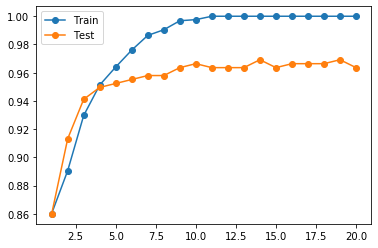

In [91]:
from sklearn.metrics import accuracy_score
train_score=[]
test_score=[]
values=[i for i in range(1,21)]
for i in range(1,21):
    rf1=RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=i)
    rf1.fit(X_sm,y_sm)
    y_train_pred=rf1.predict(X_sm)
    y_test_pred=rf1.predict(X_test)
    train_score.append(accuracy_score(y_sm,y_train_pred))
    test_score.append(accuracy_score(y_test,y_test_pred))
    print('>%d, train: %.3f, test: %.3f' % (i,accuracy_score(y_sm,y_train_pred),accuracy_score(y_test,y_test_pred)))
plt.plot(values, train_score, '-o', label='Train')
plt.plot(values, test_score, '-o', label='Test')

plt.legend()
plt.show()

### Let us try setting the max_depth paramter in random forest to 10.

In [176]:
rf2=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,random_state=16)

In [177]:
rf2.fit(X_sm,y_sm)
y_rf2_pred=rf2.predict(X_test)

In [178]:
print(confusion_matrix(y_test,y_rf2_pred))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test,y_rf2_pred))

[[156   8]
 [  8 256]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       164
           1       0.97      0.97      0.97       264

    accuracy                           0.96       428
   macro avg       0.96      0.96      0.96       428
weighted avg       0.96      0.96      0.96       428



In [117]:
y_rf2_pred=rf2.predict(X_test1)

In [118]:
print(confusion_matrix(y_test1,y_rf2_pred))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test1,y_rf2_pred))

[[335 114]
 [207 617]]
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       449
           1       0.84      0.75      0.79       824

    accuracy                           0.75      1273
   macro avg       0.73      0.75      0.73      1273
weighted avg       0.76      0.75      0.75      1273



### Let us try changing the up sampling strategy = 0.75

#### 1. Decision Tree on test set with new sampling strategy.

In [133]:
print(confusion_matrix(y_test1,y_dt_test))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test1,y_dt_test))

[[251 198]
 [361 463]]
              precision    recall  f1-score   support

           0       0.41      0.56      0.47       449
           1       0.70      0.56      0.62       824

    accuracy                           0.56      1273
   macro avg       0.56      0.56      0.55      1273
weighted avg       0.60      0.56      0.57      1273



#### 2. Random Forest with new sampling strategy.

In [179]:
print(confusion_matrix(y_test1,y_rf_test))
##print('Precision score: ',precision_score(y_test,y_dt_pred))
##print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test1,y_rf_test))

[[321 128]
 [194 630]]
              precision    recall  f1-score   support

           0       0.62      0.71      0.67       449
           1       0.83      0.76      0.80       824

    accuracy                           0.75      1273
   macro avg       0.73      0.74      0.73      1273
weighted avg       0.76      0.75      0.75      1273

